# 📘 Decision Trees: Predicting Admission Chances

## 📌 Introduction
This notebook demonstrates how to use **Decision Trees** for classification and regression. We will use the **Admission Chance dataset**, where the goal is to predict whether a student will be admitted based on academic and test scores.

We will implement Decision Trees using:
1. **Scikit-Learn** (Traditional Machine Learning approach)
2. **TensorFlow (Deep Learning framework)**
3. **PyTorch (Deep Learning framework)**

---

In [1]:
## 📊 Step 1: Load and Explore the Data
import os
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [ ]:
# Dynamically construct the file path
base_dir = os.path.abspath(os.path.join(os.getcwd(),"..", "..", "..", "data", "01_Supervised_Learning", "01_Regression"))
file_path = os.path.join(base_dir, "Admission Chance.csv")
df = pd.read_csv(file_path)
df.drop('Serial No', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3    SOP               400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


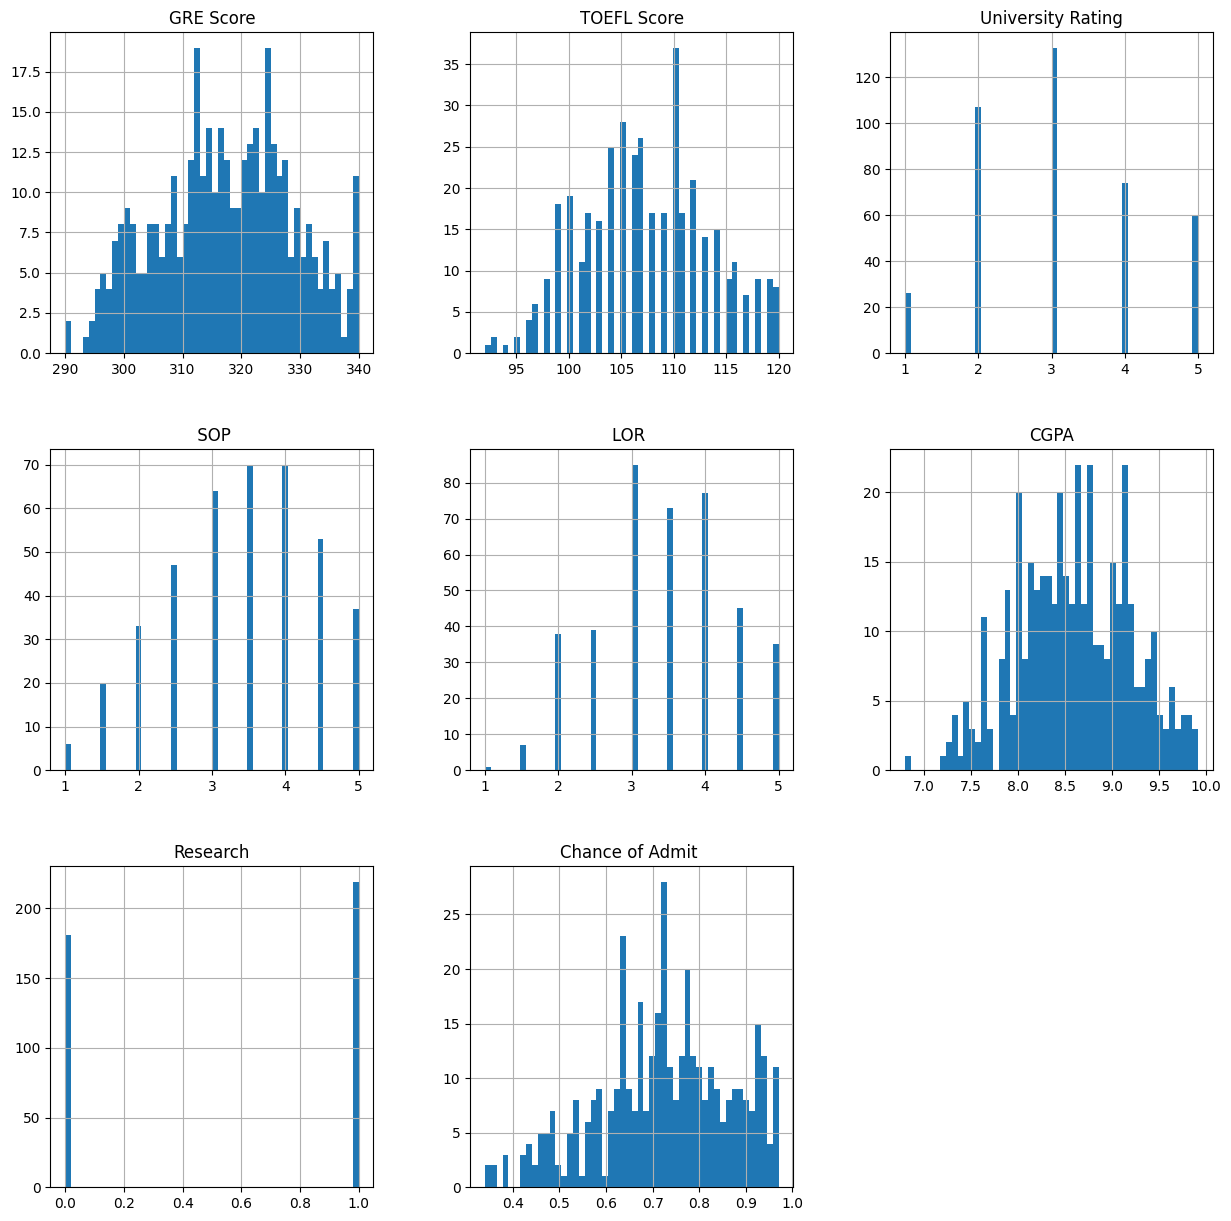

In [5]:
df.hist(bins=50, figsize=(15,15))
plt.show()

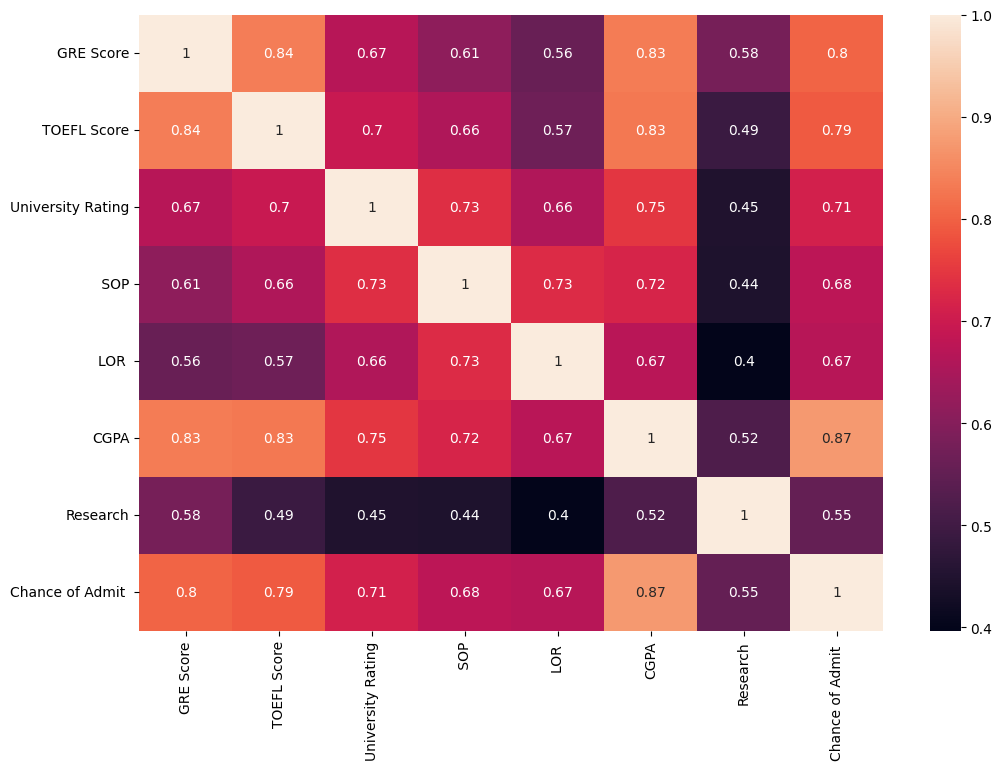

In [6]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
# define the target variable for classification
y = df['Research']
X = df.drop('Research', axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.7875
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        33
           1       0.94      0.68      0.79        47

    accuracy                           0.79        80
   macro avg       0.81      0.81      0.79        80
weighted avg       0.83      0.79      0.79        80



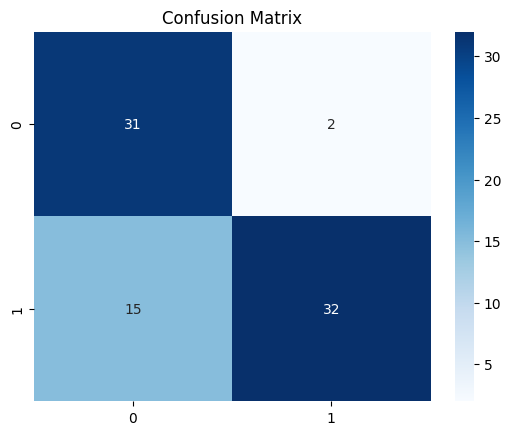

In [8]:
## 🏗️ Step 2: Decision Tree with Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# instantiate the model
model = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [12]:
# define the target variable for regression
y = df['Chance of Admit ']
X = df.drop('Chance of Admit ', axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
## 🏗️ Step 2: Decision Tree with Scikit-Learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# instantiate the model
model = DecisionTreeRegressor(max_depth=3, criterion='squared_error', random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.005837680820837699
R^2 Score: 0.773937978554051
